In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data_train=pd.read_csv("train.csv")

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [221]:
X=data_train['GrLivArea'].astype(np.float64)
y=data_train['SalePrice'].astype(np.float64)

X = (X - X.mean()) / X.std()
mn=X.mean()
std=X.std()
y=y.values.reshape(-1,1)
X= np.c_[np.ones(len(y)), X]
theta=np.array([[.001],[.002]])

In [198]:
def cost(X,y,theta):
    n=len(y)
    J=np.sum(np.square(np.matmul(X,theta)-y))/(2*n)
    return J

def gradient(X,y,theta):
    n=len(y)
    m=len(theta)
    assert X.shape ==(n,m)
    del_J= np.matmul(X.T,(np.matmul(X,theta)-y))/n
    return del_J

In [204]:
def gradient_descent(X,y,theta,lam=.01,eta=.01,niter=1000):
    
    cost_history=[cost(X,y,theta)]
    theta_history=[theta]
    
    for  i in range(niter):
        
        theta-=lam*gradient(X,y,theta)/len(y)
        theta_history.append(theta)
        
        cost_=cost(X,y,theta)
        cost_history.append(cost_)        
        change=abs((cost_history[-2]-cost_history[-1])/cost_history[-2])
        if change < eta:
            print(f"iteration converged after {i} iteartaion")
            break
    return theta_history,cost_history

In [209]:
cost(X,y,theta)


19519026195.890102

In [210]:
theta

array([[0.001],
       [0.002]])

In [213]:
gradient(X,y,theta)


array([[-1.80918164e+05],
       [-3.03735963e+08]])

In [217]:
theta_history,cost_history=gradient_descent(X,y,theta,lam=.5,eta=.00001,niter=20000)
print(theta_history[-1]), len(cost_history)

iteration converged after 9706 iteartaion
[[174412.2526226 ]
 [ 54264.98039899]]


(None, 9708)

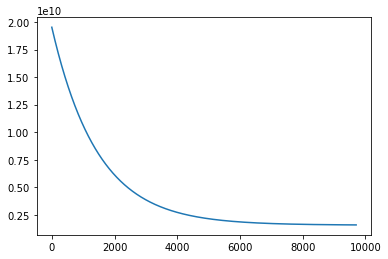

In [218]:
#plot cost function
plt.plot(cost_history)

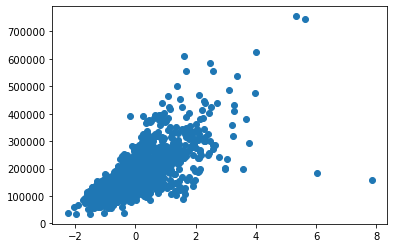

In [226]:
plt.scatter(X[:,1] ,data_train['SalePrice'].astype(np.float64) )
#plt.scatter( data_train['GrLivArea'].astype(np.float64)  ,data_train['SalePrice'].astype(np.float64) )

# draw the Linear regression line

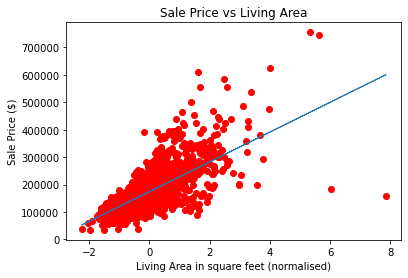

In [233]:
#ref https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(X[:,1], y, color='red')
line, = ax.plot([], [], lw=1)
y_pred = theta_history[-1][0]*X[:,0] + theta_history[-1][1]*X[:,1]
line.set_data(X[:,1], y_pred )

#or 

#plt.plot([min(X[:,1]), max(X[:,1])], [min(y_pred), max(y_pred)], color='red')  # regression line